## Неделя 2. Понедельник

### Линейная алгебра и Numpy. Часть 1

#### 1. Линейная алгебра

Реши задачи вручную и впиши ответы в ячейки под заданиями. 

**1.1** Заданы векторы $\bar{a} = (-3; 5)$ $\bar{b} = (0; -1)$. 
Найти координаты вектора $\bar{c} = \bar{a} + \bar{b}$. 

$\bar{c} = (-3; 4)$

**1.2** $\bar{a} = (3, -2)$. Найти координаты вектора $2\bar{a}$. 

$2\bar{a} = (6; -4)$

**1.3** Найти длину вектора $\bar{a} = (-4, 3) $.

5

**1.4** Найти длину вектора $\bar{a} = (1, 0, -4) $.

$\sqrt{17}$

**1.5** Известно, что скалярное произведение векторов $(\bar{a}; \bar{b}) = 2$, а их длины равны $|\bar{a}| = 2, \;, |\bar{b}| = 2$. Найти угол между векторами $\bar{a}$ и $\bar{b}$. 

60 градусов

**1.6** Найти угол между векторами $\bar{a} = (1; \sqrt{3}),\; \bar{b} = (1; 0)$

60 градусов

**1.7** Вычислить скалярное произведение векторов, если их длины $|\bar{a}| = 2, \; |\bar{b}| = 3$, а угол между ними равен 60 градусам. 

3

**1.8** Найти скалярное произведение векторов $\bar{a} = (3; -1)$ и $\bar{b} = (-2; 7)$

-13

**1.9** Написать разложение вектора $X = (-4, 4, 4)$ в базисе векторов: 
* $a = (2, 3, 1)$
* $b = (2, 7, 2)$
* $c = (5, 4, 3)$

* Иначе говоря подобрать такие $\lambda_i$, что:

* $\overline{X} = \lambda_1 \cdot \overline{a} + \lambda_2 \cdot \overline{b} + \lambda_3 \cdot \overline{c}$

* Если подставить координаты $\overline{X}, \overline{a}, \overline{b}, \overline{c}$, то поулчится три уравнение с тремя неизвестными




$\lambda_1 = {(-144)/11}$
$\lambda_2 = {52/11}$
$\lambda_3 = {28/11}$

#### 2. Базовые задачи `numpy`

В этих задачах необходимо стараться реализовать все без циклов, чтобы сохранить оптимизационное приемущество библиотеки `numpy`

__2.1__ У вас есть массив из 0 и 1. Создайте новый массив, заменив 1 на "blue", а 0 на "red".

`np.array([0, 0, 1, 0, 1]) => np.array(["red", "red", "blue", "red", "blue"])`

In [8]:
import numpy as np
a = np.array([0, 0, 1, 0, 1])
np.where(a == 1, "blue", "red")

array(['red', 'red', 'blue', 'red', 'blue'], dtype='<U4')

__2.2__ У вас есть 2 массива одинаковой длины: числовой массив x и массив b из 0 и 1. Рассчитайте среднее элементов массива x на тех позициях, где b == 0, и среднее на тех позициях, где b == 1.

```
x = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 0, 0, 1]) => {0: 3.5, 1: 2.6666666666666665}
```

In [17]:
x = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 0, 0, 1])
mask_for_0 = (b == 0)
mask_for_1 = (b == 1)
d = {0: x[mask_for_0].mean().tolist(), 1: x[mask_for_1].mean().tolist()}
d

{0: 3.5, 1: 2.6666666666666665}

__2.3__ Напишите функцию, которая получает на вход двумерный массив, и классификатор "row" или "column", и вычисляет среднее соответственно либо по строкам, либо по колонкам.

```
X = np.array([[0, 1], [2, 1]])

row_or_column_means(X, "row")    => np.array([0.5, 1.5])
row_or_column_means(X, "column") => np.array([1.0, 1.0])
```

In [60]:
def row_or_column_means(X, axis: str):
    if axis == "row":
        return X.mean(axis=1)
    elif axis == "column":
        return X.mean(axis=0)
    else:
        raise ValueError ("axis = 'row' or 'column'")


X = np.array([[0, 1], [2, 1]])
row_or_column_means(X, axis = "row")

array([0.5, 1.5])

__2.4__ Имея массив x и матрицу M (в виде двумерного массива), найдите строку в М, которая имеет наименьший угол с x.

In [203]:
x = np.array([1, 1])
M = np.array([[1, 1], 
              [2, 2],
              [3, 3]])

def max_cos_vector(M, x):
    cos_simil = (M @ x) / np.linalg.norm(M, axis=1) * np.linalg.norm(x)
    return np.argmax(cos_simil)

M[max_cos_vector(M,x)] # в данном случае все значения М к х являются одним вектором, на выход получаем самый длинный


array([3, 3])

__2.5__ Получив числовую матрицу М, создайте новую матрицу, состоящую только из колонок М, в которых есть хотя бы одно отрицательное значение.

In [153]:
M=np.random.randint(-1, 5, size=(4,3))
print(f"До:\n{M}")

def positive_column(x):
    return M[:, np.any(M < 0, axis=0)]

print(f"После:\n{positive_column(M)}")


До:
[[ 3  0 -1]
 [ 3  3  3]
 [ 1  4 -1]
 [-1  1  1]]
После:
[[ 3 -1]
 [ 3  3]
 [ 1 -1]
 [-1  1]]


__2.6__ Напишите функцию, которая меняем местами 2 строки матрицы:

`def swap_rows(M, i, j)`

In [154]:
def swap_rows(M, i, j):
    M[[i,j]] = M[[j,i]]
    return M

M = np.array([[2, 5], 
              [3, 6],
              [4, 7],
              [6, 8]])

swap_rows(M, 0, -1)


array([[6, 8],
       [3, 6],
       [4, 7],
       [2, 5]])

__2.7__ Напишите функцию, которая создает квадратную матрицу с 0 и 1 в шахматном порядке.

```
[
  [1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1],
  [0, 1, 0, 1, 0],
  [1, 0, 1, 0, 1],
]
```

In [235]:
def matrix_chess(n):
    M = np.zeros((n,n), dtype=int)
    M[::2, ::2] = 1
    M[1::2, 1::2] = 1
    return M

matrix_chess(5)

array([[1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1]])

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "linear algebra tasks in progress"`
4. Выполни команду `git push`

#### 3. Линейная алгебра + numpy в контексте машинного обучения

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

__3.1 Рекомендательные системы__

* У нас есть матрица оценок десяти пользователей по двум фильмам.

In [172]:
names = np.array(['John', 'Michael', 'David', 'James', 'William', 'Emily', 'Emma',
       'Olivia', 'Sophia', 'Isabella'])
moovie1 = np.array([ 7,  7,  4,  4, 10,  1,  1,  9,  5,  3])
moovie2 = np.array([ 1,  3,  9, 10,  3,  6, 10,  5,  6,  5])

In [185]:
df = pd.DataFrame(data={'moovie1': moovie1, 'moovie2': moovie2}, index=names)
df

,moovie1,moovie2
John,7,1
Michael,7,3
David,4,9
James,4,10
William,10,3
Emily,1,6
Emma,1,10
Olivia,9,5
Sophia,5,6
Isabella,3,5


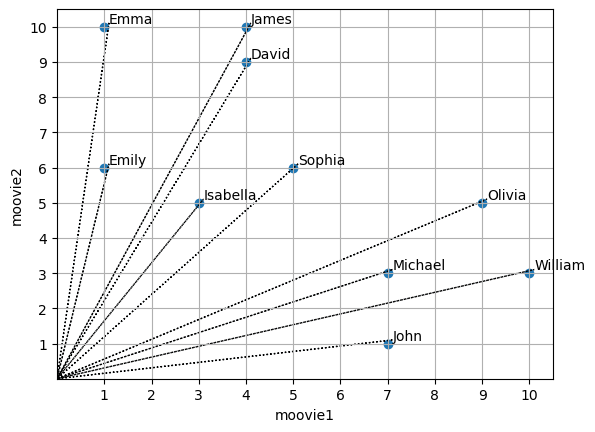

In [174]:
plt.scatter(df['moovie1'], df['moovie2'])
plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(1, 11, 1))
plt.xlim(0, 10.5)
plt.ylim(0, 10.5)
plt.xlabel('moovie1')
plt.ylabel('moovie2')

for i in range(len(df)):
    plt.arrow(0, 0, *(df.iloc[i] + 0.1), length_includes_head=True, linestyle=':')
    plt.text(*(df.iloc[i] + 0.1), names[i])
plt.grid();

1. Найдите для __Michael__ самого ближнего кинолюбителя по косинусному сходству(см.формулу в [лекции](https://github.com/Elbrus-DataScience/ds-phase-1/blob/master/slides/LinAlg_day1.pdf)), то есть имеющего c ним минимальный угол
2. То же самое, что в первом пункте, только по [евклидову расстоянию](https://www.engati.com/glossary/euclidean-distance)

In [207]:
Michael = np.array([7, 3])
df_new = df[df.index!='Michael']

print(f"Самый ближний кинолюбитель по косинусному сходству для Michael - это {df_new.iloc[max_cos_vector(df_new, Michael)].name}")
# total_ratings = your_code. Не забудьте Michael убрать из матрицы оценок

Самый ближний кинолюбитель по косинусному сходству для Michael - это Olivia


In [216]:
def euclidean_distance(p, q):
    return np.argmin(np.sqrt(np.sum(np.square(q - p), axis=1)))

print(f"Самый ближний кинолюбитель по евклидову расстоянию для Michael - это {df_new.iloc[euclidean_distance(df_new.to_numpy(), Michael)].name}")

Самый ближний кинолюбитель по евклидову расстоянию для Michael - это John


__3.2 Image__

* Подгрузите изображение, оно цветное, поэтому имеет формат [RGB](https://media.contented.ru/glossary/rgb/#:~:text=RGB%20%E2%80%94%20%D1%8D%D1%82%D0%BE%20%D0%B0%D0%B4%D0%B0%D0%BF%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F%20%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C,%D0%BF%D0%BE%D0%BB%D1%83%D1%87%D0%B8%D1%82%D1%8C%20%D0%B1%D0%BE%D0%BB%D0%B5%D0%B5%2016%20%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%BE%D0%B2%20%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2.) формат. Каждый пиксель кодируется тремя значениями.

* Постройте subplot из 4 графиков. Где будут - исходное изображение, и изображение только с красным/зеленым/синим каналом (Для этого нужно занулить значения двух других каналов)

In [272]:
from skimage import io # pip install scikit-image

# Можете выбрать любую картинку из интернета
image_URL = 'https://masterpiecer-images.s3.yandex.net/c352b1b9801c11ee9607720ccb3e265f:upscaled'

image = io.imread(image_URL)

R_image = image.copy()
G_image = image.copy()
B_image = image.copy()

R_image[:, :, 1:] = 0
G_image[:, :, ::2] = 0
B_image[:, :, :2] = 0

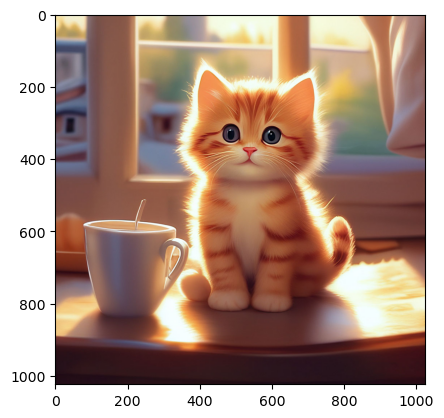

In [273]:
plt.imshow(image); # Исходное изображение

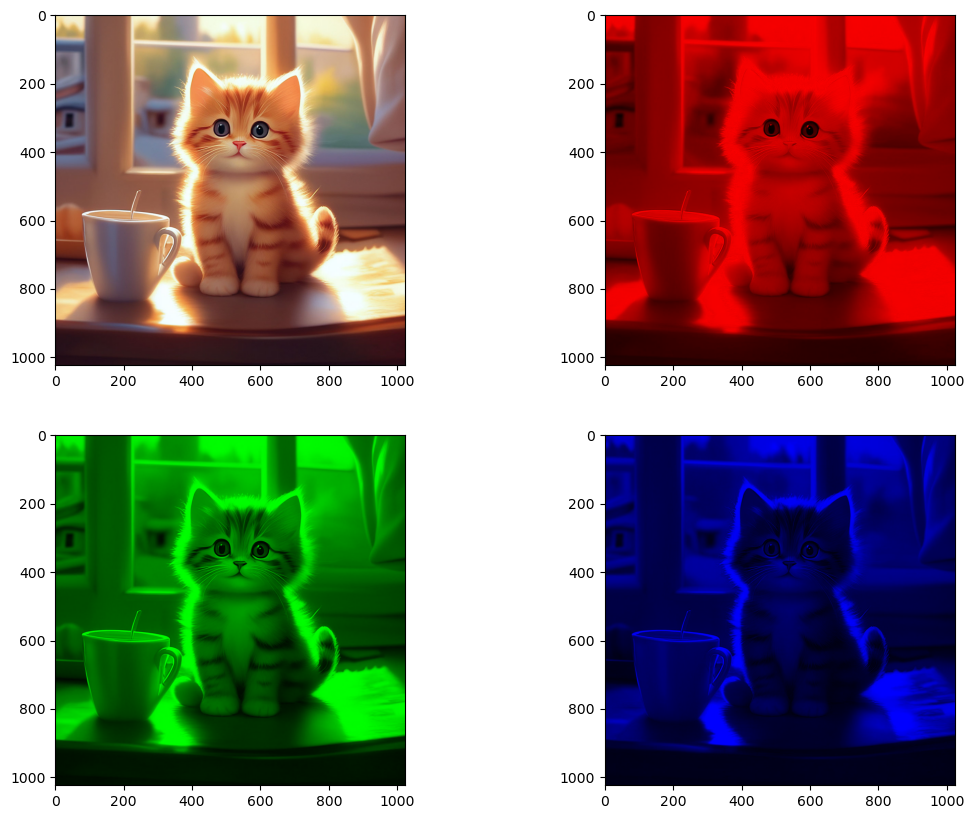

In [277]:
fig, axes = plt.subplots(2, 2, figsize=(13,10))
axes[0, 0].imshow(image)
axes[0, 1].imshow(R_image)
axes[1, 0].imshow(G_image)
axes[1, 1].imshow(B_image)
plt.show()

__3.3 ML matrix multiplication__

* у вас есть датафрейм в котором есть три признака - x1, x2, x3
* Для этих признаков посчитаны веса линейной важности
* Получите линейное предсказание значения с этими весами и сохраните в переменную __y_pred__
* Посчитайте [MeanAbsoluteError(MAE)](https://miro.medium.com/v2/resize:fit:1400/1*DzKFPy5ECU7q--O4IJGiMA.png) между __y_pred__ и __y_true__
* Сравни с коллегами свой MAE
* цикл __for__ использовать нельзя
* если вам необходима подсказка, раскомментируйте код ниже и запустите в его в ячейке markdown.

In [ ]:
# $
# \begin{pmatrix}
# x_{11} & x_{12} & x_{13}\\ 
# x_{21} & x_{22} & x_{23}\\
# x_{31} & x_{32} & x_{33}\\
# ... & ... & ...\\
# x_{n1} & x_{n2} & x_{n3}\\
# \end{pmatrix}
# \cdot 
# \begin{pmatrix}
# w_1\\ 
# w_2\\
# w_3
# \end{pmatrix}
# =
# \begin{pmatrix}
# x_{11} \cdot w_1 + x_{12} \cdot w_2 + x_{13} \cdot w_3\\ 
# x_{21} \cdot w_1 + x_{22} \cdot w_2 + x_{23} \cdot w_3\\ 
# x_{31} \cdot w_1 + x_{32} \cdot w_2 + x_{33} \cdot w_3\\ 
# ... \\
# x_{n1} \cdot w_1 + x_{n2} \cdot w_2 + x_{n3} \cdot w_3\\ 
# \end{pmatrix}
# $

In [7]:
df = pd.read_csv('aux/LinRegtrain.csv').drop('Unnamed: 0', axis=1).rename(columns={'y': 'y_real'})

w = np.array([12, 5, -14])

__4.4 NeuralNet__

* У нас есть архитектура(Изображена на рисунке ниже), которая преобразовывает 5-мерный входной вектор в одномерное число. Необходимо реализовать эту архитектуру(без цикла __for__, используя лишь матричные умножения 😊

* Немножко комметариев. 

* 5 входов, каждый из которых далее, после домножения на некоторый вес будет уходить в узел(a1, a2, a3, a4), где их результаты сложатся с другими пришедшими в этот узел значениями. После подобный трюк повторяется, где значения уже агрегируются в один узел, который и будет выходным.

* У вас будет подаваться на вход 100 объектов, каждый имеет 5 координат(матрица 100x5). Необходимо поулчить для этих 100 объектов их 100 выходных значений(матрица 100x1) 

* Матрица весов данной архитектуры приведена ниже, как и входные данные.

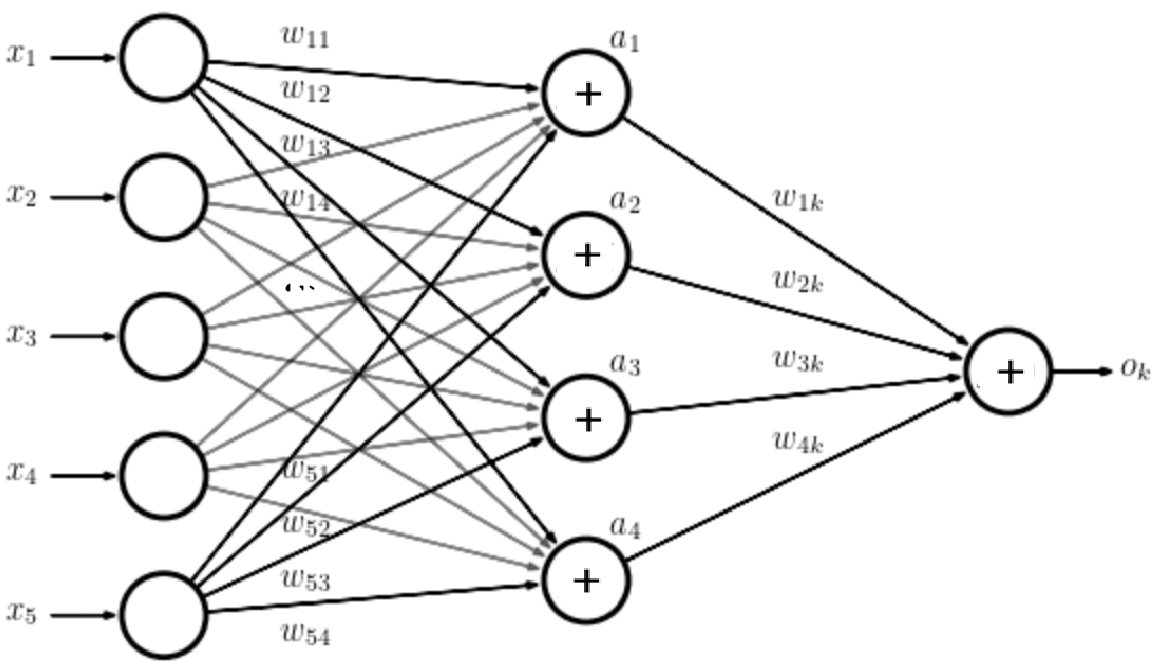

In [9]:
display(Image(filename='aux/NN_linalg.png', width=600))

In [15]:
from aux.test_file import true_result # для проверки

In [16]:
df = pd.read_csv('aux/df_neural_net.csv')

w_the_first_step = np.array(
    [
        [ 1.06959457,  0.39994398,  0.32458136,  2.83954369],
        [ 1.17062841, -1.14434952,  1.22011098,  1.15105695],
        [-1.33775915,  0.68586145, -0.50537923,  1.43315248],
        [ 0.0292406 , -0.25286966,  0.36698391,  1.27478642],
        [-0.01198158, -0.35860788, -0.14267706,  0.7329078 ]
    ]
)
w_the_second_step = np.array(
    [
        [-0.15203543],
        [-2.95253159],
        [-1.40000615],
        [-1.32788034]
    ]
)

In [ ]:
result = # your_code

In [ ]:
def check_result(my_result, true_result):
    return list(np.round(my_result, 3)) == list(np.round(true_result, 3))

In [ ]:
assert check_result(result, true_result), 'Ответ неверный! Поищи ошибку:)'

* Если ответ сошелся, поздравляю). Эта простейшая нейронная сеть, которая могла бы предсказывать по 5 входным параметрам одно значение, например уровень спроса в магазине и еще миллион примеров:)

#### 4 Линейная алгебра с помощью `numpy`

1. Задай приведенные матрицы и вычисли их ранг. Соответствующая функция расположена в `numpy.linalg`

❓Что такое ранг матрицы? О чем его значение говорит нам?

> ответ тут

2.
$$
\begin{pmatrix}
2 & -1 & 3 & -2 & 4 \\
4 & -2 & 5 & 1 & 7 \\ 
2 & -1 & 1 & 8 & 2
\end{pmatrix}
$$

In [ ]:
rank = pass
print(f'Matrix rank is {rank}')

3. 
$$
\begin{pmatrix}
4 & -7 & -2 & 1  \\
-1 & 3 & 3 & -4 \\ 
-3 & 5 & 1 & 0 \\ 
-2 & 3 & 0 & 1 \\ 
1 & -2 & -1 & 1
\end{pmatrix}
$$


In [ ]:
rank = pass
print(f'Matrix rank is {rank}')

4. 
$$
\begin{pmatrix}
1 & -2 & 3 & 5 \\ 
10 & 2 & -1 & 3 \\ 
8 & 6 & -7 & -7
\end{pmatrix}
$$

In [ ]:
rank = pass
print(f'Matrix rank is {rank}')

5. Вычисли обратную матрицу для приведенных ниже. Соответствующая функция есть в `numpy.linalg`

$$
\begin{pmatrix}
1 & 2 & -1\\ 
3 & 0 & 2 \\ 
4 & -2 & 5
\end{pmatrix}
$$

In [ ]:
inv_m = pass
print(f'Inverse matrix is {inv_m}')

6. 
$$
\begin{pmatrix}
2 & 4 & 3 \\ 
3 & 2 & 5 \\ 
5 & 6 & 8
\end{pmatrix}
$$

In [ ]:
inv_m = pass
print(f'Inverse matrix is {inv_m}')

7. 
$$
\begin{pmatrix}
1 & 2 & 0 \\ 
0 & 3 & 1 \\ 
0 & 1 & 2
\end{pmatrix}
$$

In [ ]:
inv_m = pass
print(f'Inverse matrix is {inv_m}')

8. Найди определитель матриц с помщью [numpy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html)

❓ Какой вывод мы можем сделать, если определитель матрицы равен нулю?

> ответ тут

9.
$$
\begin{pmatrix}
2 & -5 \\ 
4 & 3
\end{pmatrix}
$$

In [ ]:
det_m = pass
print(f'det(m) = {det_m}')

10. 
$$
\begin{pmatrix}
2 & 9 \\ 
0 & -1 
\end{pmatrix}
$$

In [ ]:
det_m = pass
print(f'det(m) = {det_m}')

11. 
$$
\begin{pmatrix}
0 & 1\\ 
0 & 2
\end{pmatrix}
$$

In [ ]:
det_m = pass
print(f'det(m) = {det_m}')

12. 

$$
\begin{pmatrix}
-4 & 0 & 5 \\
1 & 2 & -3 \\ 
-1 & 3 & 4
\end{pmatrix}
$$

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "linear algebra tasks completed"`
4. Выполни команду `git push`

Выполни команду в ячейке ниже `!git status`

In [ ]:
# code 